<a href="https://colab.research.google.com/github/lukeaal/lukeaal/blob/main/CounterPointNN_PredictFirstNote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This network takes 8 bass notes as input and learns to predict the first note of the melody line.

Imports

In [ ]:
import numpy as np

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import Data

In [ ]:
filepath = '/content/drive/MyDrive/UROC/Data sets/c_maj_firstnote.csv'
file = open(filepath)

import csv
csvreader = csv.reader(file)
next(csvreader)

input = []
output = []

for row in csvreader:
  input.append('')
  output.append('')
  for i in range(len(row) - 1):
    input[-1] += (str(row[i]) + " ")  
  output[-1] += str(row[i+1])

print('input:', input)
print('output:', output)

input: ['C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 G4 A4 B4 D5 G4 B4 C5 ', 'C5 D5 F5 D5 A4 C5 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'G5 F5 D5 A5 G5 A5 D6 C6 ', 'C5 F5 E5 D5 C5 B4 D5 C5 ', 'C5 B4 C5 G5 B4 D5 B4 C5 ', 'G5 D5 E5 C6 B5 A5 D5 C5 ', 'G5 F5 E5 G5 B5 G5 B5 C6 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 G4 C4 E4 G4 E4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C6 E6 D6 E6 G6 F6 D6 C6 ', 'G5 B5 A5 C6 F5 G5 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 F5 E5 C5 A4 C5 B4 C5 ', 'G6 F6 A5 C6 B5 D6 B5 C6 ', 'C6 A5 C6 F5 G5 A5 B5 C6 ', 'G4 F4 A4 E4 G4 F4 D4 C4 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'G4 B4 G4 B4 A4 E5 B4 C5 ', 'G4 F4 E4 B4 G4 C5 B4 C5 ', 'G5 D5 E5 D5 E5 A5 D5 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C5 A4 E5 C5 D5 G4 B4 C5 ', 'C6 D6 C6 B5 D6 C6 D6 C6 ', 'C5 A4 E5 C5

Arrange Data

In [ ]:
def make_label_dict(out_data):
  """create a one hot encoded dictionary for each unique note in output data"""
  unique_data = []

  for s in out_data:
    n_list = s.split(" ")
    for note in n_list:
      if note not in unique_data and note: # checks for prior equivelancy and existance
        unique_data.append(note)

  # get total number of unique categories
  num_of_categories = len(unique_data)

  # create one hot categorical vector
  label_vect = to_categorical([x for x in range(num_of_categories)])
  label_vect = label_vect.astype(int)

  # make a dictionary of unique categories and an int label
  label_dict = {}
  for i in range(len(unique_data)):
    label_dict[unique_data[i]] = list(label_vect[i])

  return (label_dict)


label_dict = make_label_dict(output)
num_of_label_categories = len(label_dict)


print("Train Label Dictionary:\n", label_dict)
print("Number of Label Categories: ", num_of_label_categories)




Train Label Dictionary:
 {'C6': [1, 0, 0], 'C4': [0, 1, 0], 'C5': [0, 0, 1]}
Number of Label Categories:  3


Integer Encoding

In [ ]:
from numpy import array
input_size = 10 # should be a bit highter than note list length


def encode_data(in_data):
  """encode notes into integer vector"""
  encoded_notes = [one_hot(note, input_size) for note in in_data]
  for l in encoded_notes:
    for x in l:
      x = int(x)
  encoded_notes = array(encoded_notes)

  return encoded_notes

def find_lables(out_data, label_dict):
  """generate output label vector"""
  out_labels = [label_dict[note] for note in out_data]
  out_labels = array(out_labels)

  return out_labels


# encoded_train_data = encode_data(input)
# encoded_test_data = encode_data(test_input)

# train_lables = find_lables(train_output, train_label_dict)
# test_lables = find_lables(test_output, train_label_dict)

# print("Encoded Train Data:\n", encoded_train_data)
# print("Train Lables:\n", train_lables)

# print("\nEncoded Test Data:\n", encoded_test_data)
# print("Test Lables:\n", test_lables)

encoded_input = encode_data(input)
output_lables = find_lables(output, label_dict)

print("Encoded Data:\n", encoded_input)
print("Lables:\n", output_lables)



Encoded Data:
 [[7 7 3 ... 1 7 7]
 [7 1 7 ... 1 7 7]
 [7 8 9 ... 7 7 7]
 ...
 [7 7 3 ... 1 7 7]
 [6 9 7 ... 8 7 7]
 [7 8 7 ... 7 8 7]]
Lables:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [0 0 1]
 [1 0 0]]


Split Data

In [ ]:
from random import shuffle

def split_data(all_input, all_output, split_percentage):

  # shuffle and split indexes
  """
  basically we create a list of however long our input data is, and then shuffle it so it is randomized.
  we can then slice that list of indices to get indexes for randomly split train and test datasets.
  """
  input_length = len(input)
  portion = round((input_length) * split_percentage)

  ran_index_list = list(range(input_length))
  shuffle(ran_index_list)
  #print(ran_index_list)

  train_indices = ran_index_list[:portion]
  test_indices = ran_index_list[portion:]


  # split data using generaged indices
  
  all_input = all_input.tolist()
  all_output = all_output.tolist()

  train_i = []
  train_o = []

  test_i = []
  test_o = []

  # generate test data
  for index in train_indices:
    train_i += [all_input[index]]
    train_o += [all_output[index]]

  # generate train data
  for index in train_indices:
    test_i += [all_input[index]]
    test_o += [all_output[index]]

  return (train_i, train_o, test_i, test_o)


#call split function
splits = split_data(encoded_input, output_lables, 0.80)

train_input = array(splits[0])
train_lables = array(splits[1])
test_input = array(splits[2])
test_lables = array(splits[3])

print("train_input:\n", train_input)
print("train_lables:\n", train_lables)
print("test_input:\n", test_input)
print("test_lables:\n", test_lables)

train_input:
 [[7 7 3 ... 1 7 7]
 [7 7 1 ... 7 8 7]
 [7 7 3 ... 1 7 7]
 ...
 [7 7 3 ... 1 7 7]
 [7 3 7 ... 9 8 7]
 [7 8 8 ... 1 7 6]]
train_lables:
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 0 1]
 [1 0 0]]
test_input:
 [[7 7 3 ... 1 7 7]
 [7 7 1 ... 7 8 7]
 [7 7 3 ... 1 7 7]
 ...
 [7 7 3 ... 1 7 7]
 [7 3 7 ... 9 8 7]
 [7 8 8 ... 1 7 6]]
test_lables:
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 0 1]
 [1 0 0]]


Create Model

In [ ]:
model = Sequential()

embedding_layer = Embedding(input_dim = input_size, output_dim = 4, input_length = 8)

model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(num_of_label_categories, activation='softmax'))
model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 4)              40        
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None


Fit Model

In [ ]:
history = model.fit(train_input, train_lables, epochs=100, callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10), validation_data=(test_input, test_lables))



Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 1.0471 - accuracy: 0.6037 - val_loss: 0.9986 - val_accuracy: 0.7125
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9527 - accuracy: 0.7113 - val_loss: 0.9018 - val_accuracy: 0.7100
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8563 - accuracy: 0.7088 - val_loss: 0.8069 - val_accuracy: 0.7075
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7644 - accuracy: 0.7075 - val_loss: 0.7205 - val_accuracy: 0.7138
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.7175 - val_loss: 0.6517 - val_accuracy: 0.7275
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.7325 - val_loss: 0.5994 - val_accuracy: 0.7450
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7500 - val_loss: 0.5602 - val_accuracy: 0.7663
Epoch 8/100


View Embedding Weights

In [ ]:
print(embedding_layer.get_weights()[0].shape)
print(embedding_layer.get_weights())

(10, 4)
[array([[-0.01022506, -0.0419894 , -0.01581949,  0.04806255],
       [ 0.42454955,  1.0182464 ,  0.42589897, -0.84984094],
       [ 0.3522132 , -0.07865026, -0.37403134, -0.09409666],
       [-0.4920287 , -0.3205787 ,  0.459401  ,  0.49575144],
       [ 0.2841039 ,  0.1217183 ,  0.6456001 ,  0.8161882 ],
       [-0.02087692,  0.02688533, -0.0131892 , -0.02350608],
       [ 0.4350809 ,  1.0618225 ,  0.54812664,  0.37129068],
       [-0.33252123, -0.2694125 , -0.3218705 , -0.42411947],
       [ 0.4189799 , -0.1802054 , -0.5618987 ,  0.2614665 ],
       [ 0.62814134,  0.21389394,  0.1294047 ,  0.16054049]],
      dtype=float32)]


Evaluate Model

25/25 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.9038
loss:  0.23167908191680908
accuracy:  0.9037500023841858


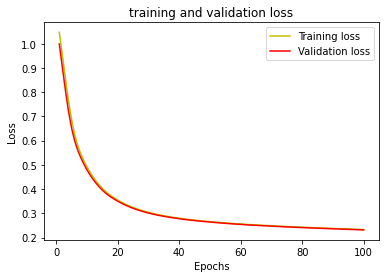

In [ ]:
loss, accuracy = model.evaluate(test_input, test_lables)
print("loss: ", loss)
print("accuracy: ", accuracy)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#plot the training and validation accuracy and loss at each epoch - taken from https://github.com/bnsreenu/python_for_microscopists/blob/master/143-multiclass_cifar.py
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()